TP1: Introduction aux opérateurs de base de PyTorch (Décomposition d'une image à l'aide d'ondelette de Haar et autres traitement)
============

Introduction au sujet
------

L'objectif de ce sujet est d'étudier des opérateurs de base de Pytorch au travers de la décomposition par ondelette de Haar d'une image. La décomposition d'une image en ondelette est notamment utilisé en compression dans des formats de fichier tel que JPEG2000. Nous travaillerons sur une photographie d'[Ada Lovelace](https://fr.wikipedia.org/wiki/Ada_Lovelace) qui vous est fournis. 

Le code est à écrire en python3 à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée*, à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du run permettant de retrouver par la suite dans quel ordre ont été lancés chaque bloc.

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie Pytorch:
- PyTorch: https: https://pytorch.org/docs/stable/

Commencez par importer les librairies nécessaires au TP.

In [1]:
# Import Torch

import torch
import torch.nn as nn

# Import numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

2 - Décomposition d'une image à l'aide d'ondelette de Haar
----

Commencez par importer l'image sur lequel nous allons travailler à l'aide de l'instruction suivante:

In [2]:
im = plt.imread('ada.png')

Affichez l'image avec matplotlib.

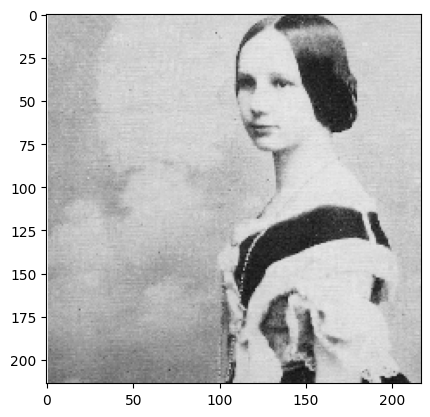

In [3]:
plt.imshow(im)

Convertissez l'image en `Tensor` Pytorch.

In [4]:
t_im = torch.Tensor(im)

L'image que vous avez chargée est considéré comme une image couleur, les trois canaux sont identiques. Gardez uniquement un seul canal. 

In [5]:
print("Taille de l'image avant : ",t_im.shape)
t_im_r = t_im[:,:,0]
print("Taille de l'image après : ",t_im_r.shape)

Taille de l'image avant :  torch.Size([214, 217, 4])
Taille de l'image après :  torch.Size([214, 217])


L'image fait actuellement 214x217. Tronquez l'image pour ne garder que les 200 premières lignes et colonnes.

In [6]:
print("Taille de l'image avant : ",t_im_r.shape)
t_im_200 = t_im_r[:200,:200]
print("Taille de l'image après : ",t_im_200.shape)

Taille de l'image avant :  torch.Size([214, 217])
Taille de l'image après :  torch.Size([200, 200])


Appliquez un `average pooling` sur l'image en utilisant la fonction se trouvant dans `torch.nn.functional` . Faites en sortes que la nouvelle image soit quatre fois plus petite que la précédente.

In [7]:
avg = nn.functional.avg_pool2d(t_im_200[None,None,:,:],(4,4))
print(avg.shape)

torch.Size([1, 1, 50, 50])


Affichez l'image de la question précédente. Quel a eu comme effet sur l'image l'application de la couche d' `average pooling` ?

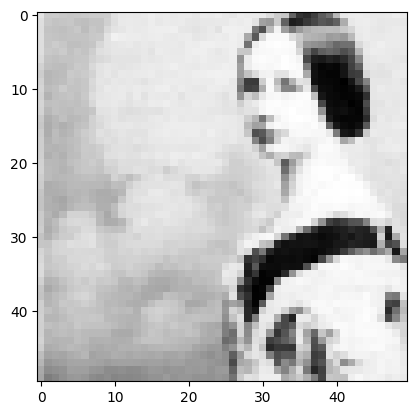

In [8]:
plt.imshow(avg[0,0,:,:],cmap='gray')

Effectuez maintenant un `average pooling` en moyennant uniquement les colonnes de l'image deux par deux.

Dimension :  torch.Size([1, 1, 200, 100])


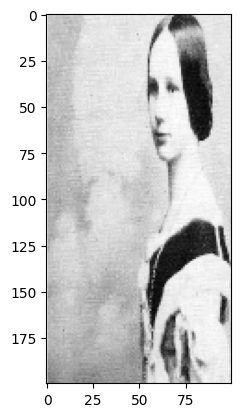

In [9]:
avg_2 = nn.functional.avg_pool2d(t_im_200[None,None,:,:],(1,2))
print("Dimension : ", avg_2.shape)
plt.imshow(avg_2[0,0,:,:],cmap="gray")

Déclarez un vecteur contenant deux 1 que vous nommerez `f`. Faites en sortes que les dimensions de `f` soit (1,2).

In [10]:
f = torch.Tensor([[1,1]])
print(f)
print(f.shape)

tensor([[1., 1.]])
torch.Size([1, 2])


Faites une convolution entre l'image et le filtre `f` avec un `stride` de 1 sur les lignes et 2 sur les colonnes. Vous utiliserez la fonction se trouvant dans `torch.nn.functional`.

Expliquez pourquoi on obtient un résultat similaire à l'utilisation d'un `average pooling` à un facteur près.

torch.Size([1, 1, 200, 100])


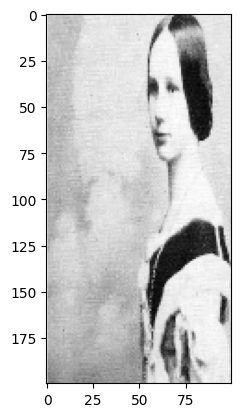

In [11]:
avg_3 = nn.functional.conv2d(t_im_200[None,None,:,:],f[None,None,:,:],stride=(1,2))
print(avg_3.shape)
plt.imshow(avg_3[0,0,:,:],cmap="gray")

En utilisant un filtre de convolution bien choisi. Calculez l'image tel que chaque pixel correspond au calcul de $x_{i,j}-x_{i+1,j}$ où $x_{i,j}$ est le pixel de la ligne $i$, colonne $j$.

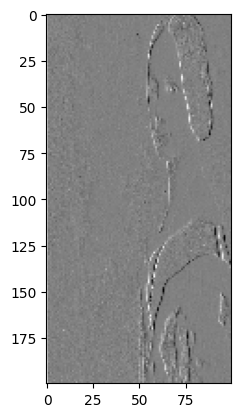

In [12]:
f2 = torch.Tensor([[1,-1]])
conv = nn.functional.conv2d(t_im_200[None,None,:,:],f2[None,None,:,:],stride=(1,2))
plt.imshow(conv[0,0,:,:],cmap="gray")

En construisant un filtre approprié, faites en sortes d'utiliser une seule convolution pour produire les deux images précédentes en même temps. Le résultat de chacune des convolutions correspondra à un canal. Vous appellerez le tenseur de sortie `im_out1` et le noyau utilisé `k_colonne`.

In [13]:
f3 = torch.Tensor([[1,1],[1,-1]])
im_out1 = nn.functional.conv2d(t_im_200[None,None,:,:],f3[:,None,None,:],stride=(1,2))
print("Dimension de sortie : ",im_out1.shape)

Dimension de sortie :  torch.Size([1, 2, 200, 100])


Affichez `im_out1` en deux images.

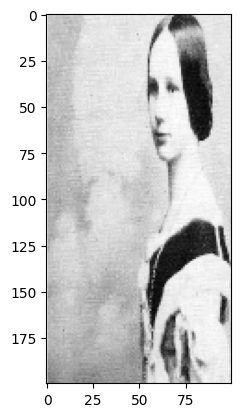

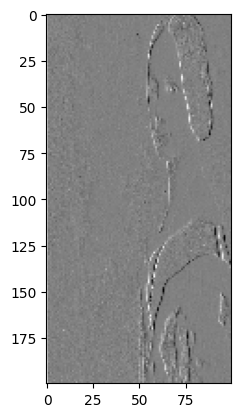

In [14]:
plt.imshow(im_out1[0,0,:,:],cmap="gray")
plt.show()
plt.imshow(im_out1[0,1,:,:],cmap="gray")
plt.show()

En utilisant un `reshape` approprié, affichez les deux canaux de `im_out1` concaténer sur les lignes en une image. Les valeurs des images n'ayant pas la même dynamique et n'étant pas entre 0 et 1, le rendu sera différent des questions précédentes, il ne vous est pas demandé de corriger le rendu.

In [15]:
im_out2 = torch.reshape(im_out1,(1,1,400,100))
print(im_out2.shape)

torch.Size([1, 1, 400, 100])


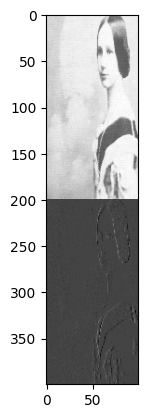

In [16]:
plt.imshow(im_out2[0,0,:,:],cmap="gray")

En utilisant la fonction `torch.transpose` en plus de la fonction `reshape`, concaténez les deux canaux sur les colonnes et affichez l'image obtenue.

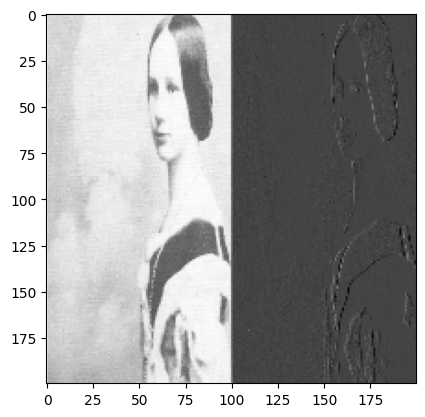

In [17]:
im_out2_2 = torch.transpose(im_out1,1,2)
im_out2_2 = torch.reshape(im_out2_2,(200,200))
plt.imshow(im_out2_2,cmap="gray")

Définissez maintenant un noyau permettant de faire les deux filtrages précédent sur les lignes et non sur les colonnes. Appelez ce noyau `k_ligne`.

In [18]:
k_ligne = torch.Tensor([[1,1],[1,-1]])
print(k_ligne)

tensor([[ 1.,  1.],
        [ 1., -1.]])


Appliquez le noyau de convolution de la question précédente avec un `stride` adapté pour faire maintenant un filtrage passe base et passe haut selon les lignes.

Dimension de sortie :  torch.Size([1, 2, 100, 199])


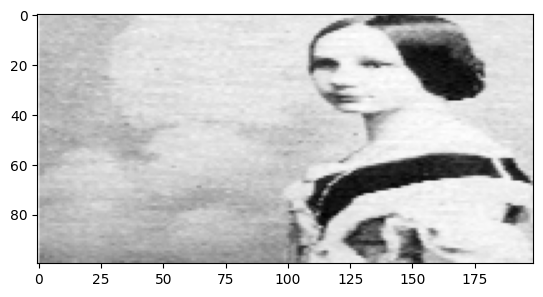

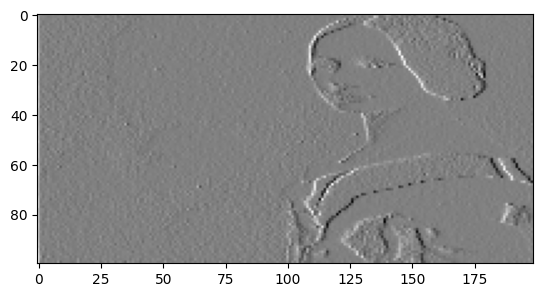

In [19]:
conv3 = nn.functional.conv2d(t_im_200[None,None,:,:],k_ligne[:,None,None,:],stride=(2,1))
print("Dimension de sortie : ", conv3.shape)
plt.imshow(conv3[0,0,:,:],cmap="gray")
plt.show()
plt.imshow(conv3[0,1,:,:],cmap="gray")
plt.show()

Concaténez `k_ligne` avec lui-même selon les lignes pour avoir un noyau `k_ligne2` de dimension `4,2`.

In [20]:
k_ligne2 = torch.cat((k_ligne,k_ligne),axis=0)
print("Dimension de k_ligne : ",k_ligne2.shape)
print(k_ligne2)

Dimension de k_ligne :  torch.Size([4, 2])
tensor([[ 1.,  1.],
        [ 1., -1.],
        [ 1.,  1.],
        [ 1., -1.]])


Utilisez le noyau `k_ligne2` sur `im_out1`. Le résultat s'appellera `im_out2`. Changez le `stride` pour vous déplacer de 2 en 2 sur les lignes et de 1 en 1 sur les colonnes. Vous mettrez également l'argument `groups` à 2 et vous expliquerez l'intérêt de cette opération.

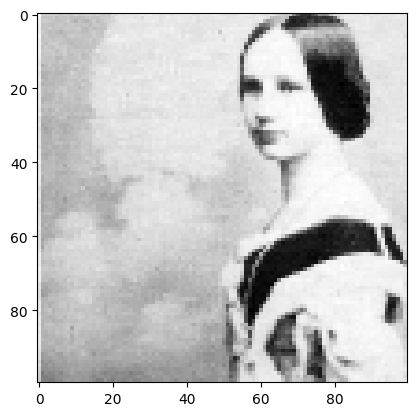

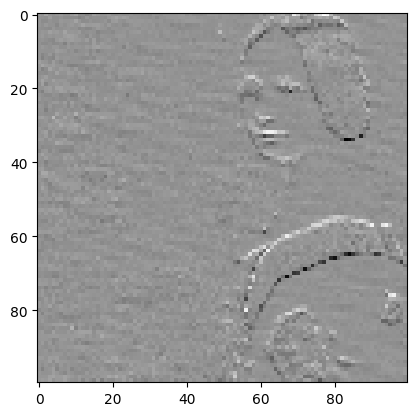

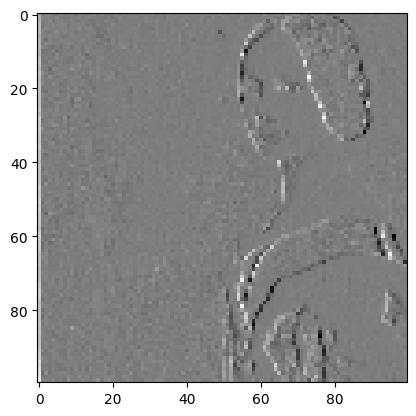

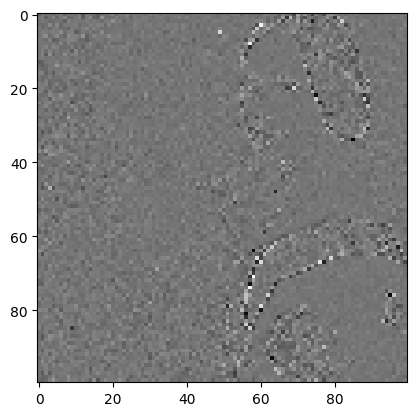

torch.Size([1, 4, 100, 100])


In [21]:
im_out3 = nn.functional.conv2d(im_out1,k_ligne2[:,None,:,None],stride=(2,1),groups=2)
plt.imshow(im_out3[0,0,:,:],cmap="gray")
plt.show()
plt.imshow(im_out3[0,1,:,:],cmap="gray")
plt.show()
plt.imshow(im_out3[0,2,:,:],cmap="gray")
plt.show()
plt.imshow(im_out3[0,3,:,:],cmap="gray")
plt.show()
print(im_out3.shape)

3 - Retrouver une transformation à partir de l'image générée
---

Afin de construire la décomposition en ondelette nous avons dans la question précédente appliqué deux convolutions successives. Le graphe de calcul que nous avons mis en place est de type image -> convolution 1 -> convolution 2 . L'enchainement de deux convolutions peut être facilement simplifié en une seule convolution (que l'on appellera convolution 12). Nous allons faire comme si on ne connaissait pas les noyaux de deux convolutions et on va essayer de retrouver la valeur du noyau utilisé pour convolution 12 à partir de l'image source et de l'image produite.  

En utilisant une classe se trouvant `torch.nn` déclarez un objet `conv12` qui permettra d'appliquer une convolution à une image. Le noyau utilisé sera de taille 2x2 avec un `stride` de 2 et il ne faudra pas utiliser de biais

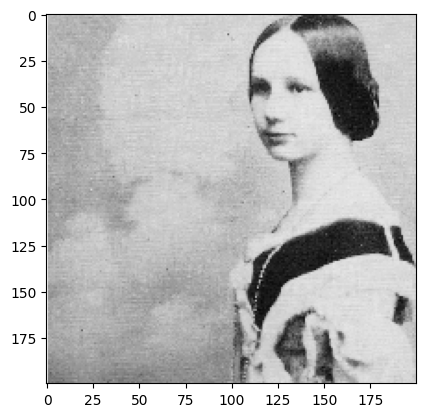

In [22]:
plt.imshow(t_im_200,cmap="gray")

In [23]:
conv12 = nn.Conv2d(1,4,2,stride=2,bias=False)

Regardez la valeur du noyau que contient la couche `conv12` (elle se trouve dans l'attribut `weight`). Cette valeur a été choisie aléatoirement et changera à chaque lancement.

In [24]:
w = conv12.weight
print(w)

Parameter containing:
tensor([[[[ 0.2605,  0.0678],
          [ 0.0829, -0.3239]]],


        [[[-0.2939, -0.4934],
          [-0.0255, -0.2199]]],


        [[[-0.3896, -0.1631],
          [-0.1074,  0.2652]]],


        [[[-0.3920,  0.4144],
          [ 0.4333, -0.1882]]]], requires_grad=True)


Appliquez la couche de convolution `conv12` à l'image initiale et visualisez le résultat.

torch.Size([1, 4, 100, 100])


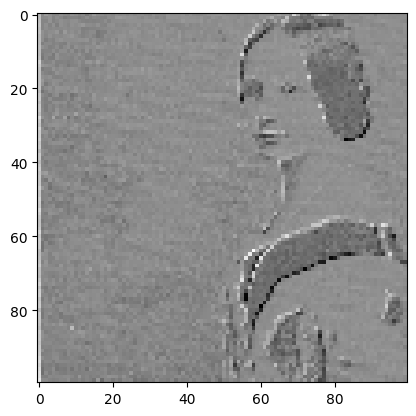

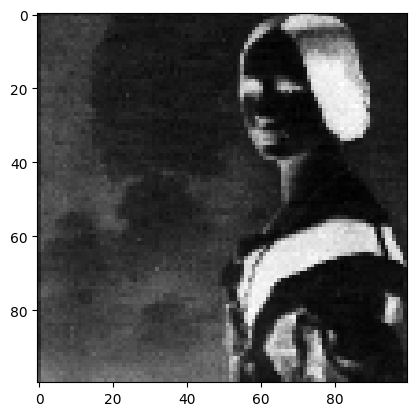

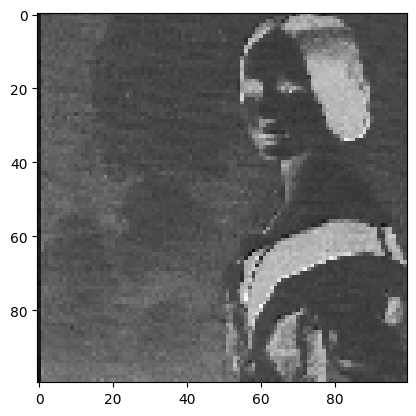

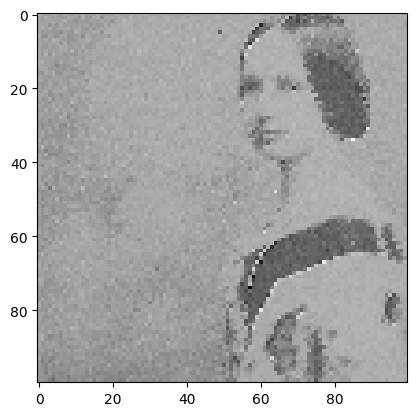

In [25]:
conv12_out = conv12(t_im_200[None,None,:,:])
print(conv12_out.shape)
imgConv12 = conv12_out.detach().numpy()
plt.imshow(imgConv12[0,0,:,:],cmap="gray")
plt.show()
plt.imshow(imgConv12[0,1,:,:],cmap="gray")
plt.show()
plt.imshow(imgConv12[0,2,:,:],cmap="gray")
plt.show()
plt.imshow(imgConv12[0,3,:,:],cmap="gray")
plt.show()

En utilisant une fonction de coût de type MSE (Mean Squared Error) calculer l'écart entre le tenseur de sortie de `conv12` et `im_out2`.

In [26]:
loss = nn.MSELoss()
result = loss(conv12_out,im_out3)
print(result)
result.backward()

tensor(2.2498, grad_fn=<MseLossBackward0>)


Appliquez la rétropropagation du gradient et affichez les valeurs de gradient pour les paramètres de la convolution.

In [27]:
print(w.grad)

tensor([[[[-1.0566, -1.0526],
          [-1.0560, -1.0527]]],


        [[[-0.2809, -0.2799],
          [-0.2772, -0.2764]]],


        [[[-0.1123, -0.1067],
          [-0.1115, -0.1059]]],


        [[[ 0.0711,  0.0723],
          [ 0.0725,  0.0712]]]])


Mettez à jours la valeur du poids de la convolution en effectuant une étape de descente de gradient. Pour faire cela vous calculerez: $w \longleftarrow w - \alpha \dfrac{\partial\ \text{loss}}{\partial w}$ en prenant $\alpha=1$. Attention pour pouvoir faire cette opération vous devez désactiver temporairement l'utilisation du gradient dans le graphe.

In [28]:
w = w - w.grad

Remettez à zéros les valeurs du gradient.

In [29]:
conv12.zero_grad()

Refaites de même pour 500 itérations de descente de gradient

In [30]:
conv12 = nn.Conv2d(1,4,2,stride=2,bias=False)
for i in range(1000):
    conv12_out = conv12(t_im_200[None,None,:,:])
    result = nn.functional.mse_loss(im_out3,conv12_out)
    result.backward()
    with torch.no_grad():
        conv12.weight -= conv12.weight.grad
    conv12.zero_grad()
print("Fonction de coût après 500 itérations: ", result)
print("Poids du réseau de neurones ", conv12.weight)

Fonction de coût après 500 itérations:  tensor(0.0006, grad_fn=<MseLossBackward0>)
Poids du réseau de neurones  Parameter containing:
tensor([[[[ 1.0792,  0.9815],
          [ 0.9318,  1.0074]]],


        [[[ 0.7137,  0.8552],
          [-0.7470, -0.8215]]],


        [[[ 0.9745, -1.0513],
          [ 0.7818, -0.7040]]],


        [[[ 0.4087, -0.4285],
          [-0.4552,  0.4755]]]], requires_grad=True)


À votre avis quel devrait être la valeur du noyau que nous cherchons ? Vérifiez que ces valeurs donnent le résultat attendu.

In [31]:
print("Valeur de la fonction de coût avec le noyau optimal", result)

Valeur de la fonction de coût avec le noyau optimal tensor(0.0006, grad_fn=<MseLossBackward0>)


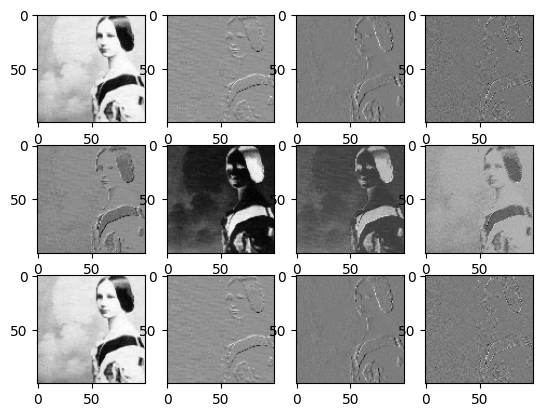

In [32]:
fig, ax = plt.subplots(3,4)
im1 = im_out3.detach().numpy()
im2 = conv12_out.detach().numpy()
ax[0,0].imshow(im1[0,0,:,:],cmap="gray")
ax[0,1].imshow(im1[0,1,:,:],cmap="gray")
ax[0,2].imshow(im1[0,2,:,:],cmap="gray")
ax[0,3].imshow(im1[0,3,:,:],cmap="gray")

ax[2,0].imshow(im2[0,0,:,:],cmap="gray")
ax[2,1].imshow(im2[0,1,:,:],cmap="gray")
ax[2,2].imshow(im2[0,2,:,:],cmap="gray")
ax[2,3].imshow(im2[0,3,:,:],cmap="gray")

ax[1,0].imshow(imgConv12[0,0,:,:],cmap="gray")
ax[1,1].imshow(imgConv12[0,1,:,:],cmap="gray")
ax[1,2].imshow(imgConv12[0,2,:,:],cmap="gray")
ax[1,3].imshow(imgConv12[0,3,:,:],cmap="gray")
plt.show()

4 - Reconstruction d'une image à partir de sa décomposition en ondelette
---

Pour reconstruire l'image à partir de sa décomposition, vous devez utiliser l'opération inverse de celle faite précédemment. En utilisant l'opérateur de convolution transpose, reconstruisez l'image.

torch.Size([1, 4, 100, 100])


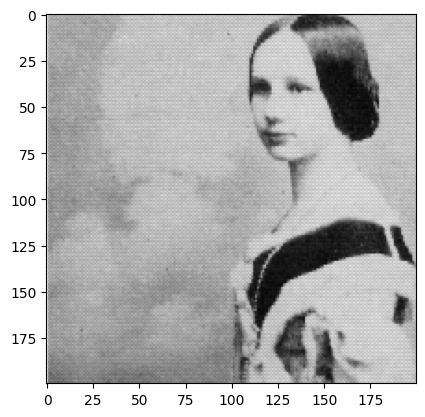

In [33]:
print(conv12_out.shape)
convT = nn.functional.conv_transpose2d(conv12_out,conv12.weight,stride=2)
imgConvT = convT.detach().numpy()
plt.imshow(imgConvT[0,0,:,:],cmap="gray")

En utilisant la fonction `plt.hist` de `matplotlib`. Visualisez l'histogramme des valeurs de chaque canal de la décomposition. Vous utiliserez 100 `bins` pour chaque histogramme.

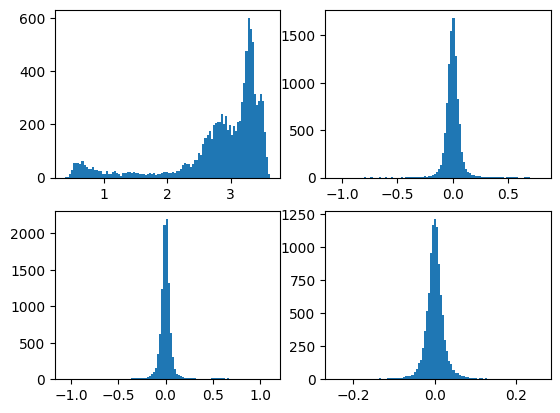

In [34]:
fig, ax = plt.subplots(2,2)
for i in range(conv12_out.shape[1]):
    ax[i//2,i%2].hist(conv12_out[0,i,:,:].detach().numpy().flatten(),bins=100)

En utilisant la fonction d'activation `hardshrink` appliquez un écrasement des valeurs entre -0.1 et 0.1 sur 0 du tenseur `im_out2`. Affichez les nouveaux histogrammes.

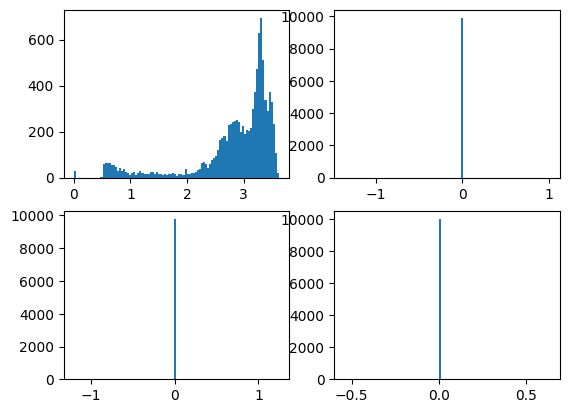

In [35]:
hard = nn.Hardshrink()
im_out3_hard = hard(im_out3)
fig, ax = plt.subplots(2,2)
for i in range(im_out3_hard.shape[1]):
    ax[i//2,i%2].hist(im_out3_hard[0,i,:,:].detach().numpy().flatten(),bins=100)

Calculez la proportion de valeurs à 0 dans cette représentation.

In [36]:
print("Proportion de valeurs initial à 0: ", torch.sum(im_out3==0)/torch.numel(im_out3))
print("Proportion de valeurs à 0: ", torch.sum(im_out3_hard==0)/torch.numel(im_out3_hard))

Proportion de valeurs initial à 0:  tensor(0.0272)
Proportion de valeurs à 0:  tensor(0.7426)


Reconstruisez l'image à partir de la décomposition modifiée de la question précédente. Comparez là à l'image initiale.

(1, 1, 200, 200)


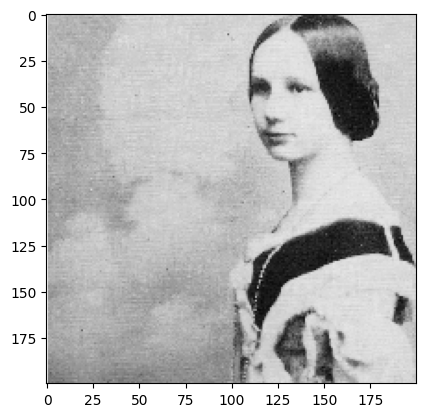

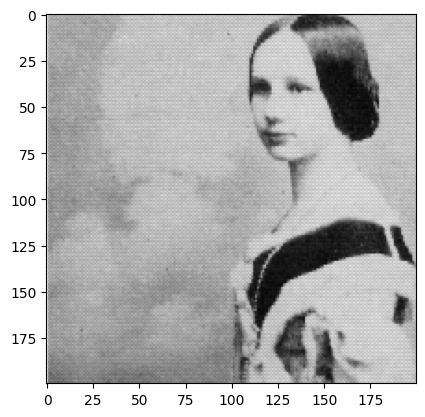

In [37]:
convT_hard = nn.functional.conv_transpose2d(im_out3_hard,conv12.weight,stride=2)
imgConvT_hard = convT.detach().numpy()
print(imgConvT_hard.shape)
plt.imshow(t_im_200,cmap="gray")
plt.show()
plt.imshow(imgConvT_hard[0,0,:,:],cmap="gray")
plt.show()